### Sentimentanalyysi kolmelle presidentille
1) Trump Overall Sentiment: {'neg': 0.07, 'neu': 0.707, 'pos': 0.223, 'compound': 0.9998}, lauseita 90, sanoja 1456, sanoja/lause 16.17, kirjaimia 8444
2) Obama Overall Sentiment: {'neg': 0.076, 'neu': 0.729, 'pos': 0.195, 'compound': 0.9998}, lauseita 90 , sanoja 2090, sanoja/lause 23.22, kirjaimia 11922
3) Kennedy Overall Sentiment: {'neg': 0.128, 'neu': 0.684, 'pos': 0.188, 'compound': 0.9989}, lauseita 52 , sanoja 1390, sanoja/lause 26.73, kirjaimia 7618

1) Trump sentiment: 0.06064516129032258
2) Obama sentiment: 0.05155642023346303
3) Kennedy sentiment: 0.02177068214804064

Analyzing Trump

In [78]:
# nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Initialize the analyzer
sia = SentimentIntensityAnalyzer()

# Example speech (replace with your actual text)
speech_trump = open('speeches/2017-Trump.txt', encoding='latin-1').read()

# Direct analysis
overall_sentiment = sia.polarity_scores(speech_trump)
print("Overall Sentiment:", overall_sentiment)

# Segmented analysis
from nltk.tokenize import sent_tokenize

# Tokenize into sentences (install punkt tokenizer if not done already)
sentences_trump = sent_tokenize(speech_trump)
for i, sentence in enumerate(sentences_trump, 1):
    sentiment = sia.polarity_scores(sentence)
    print(f"Sentence {i} Sentiment:", sentiment)

# Count total words
words = speech_trump.split()
word_count = len(words)
print(f"Total words in the file: {word_count}")

letters = len(speech_trump)
print(letters)


Overall Sentiment: {'neg': 0.07, 'neu': 0.707, 'pos': 0.223, 'compound': 0.9998}
Sentence 1 Sentiment: {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.7096}
Sentence 2 Sentiment: {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.8225}
Sentence 3 Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence 4 Sentiment: {'neg': 0.087, 'neu': 0.839, 'pos': 0.074, 'compound': -0.0516}
Sentence 5 Sentiment: {'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.8689}
Sentence 6 Sentiment: {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}
Sentence 7 Sentiment: {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
Sentence 8 Sentiment: {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4576}
Sentence 9 Sentiment: {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.6059}
Sentence 10 Sentiment: {'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'compound': 0.4767}
Sentence 11 Sentiment: {'neg': 0.149, 'neu': 0.576, 'pos': 0.275, 'compound': 0.453}
Sentence 

                                             Sentence  Compound
0   Chief Justice Roberts, President Carter, Presi...    0.7096
1   We, the citizens of America, are now joined in...    0.8225
2   Together, we will determine the course of Amer...    0.0000
3   We will face challenges, we will confront hard...   -0.0516
4   Every 4 years, we gather on these steps to car...    0.8689
..                                                ...       ...
85  And, yes, together, we will make America great...    0.7783
86                                         Thank you.    0.3612
87              God bless you, and God bless America.    0.8316
88                                         Thank you.    0.3612
89                                 God bless America.    0.5994

[90 rows x 2 columns]


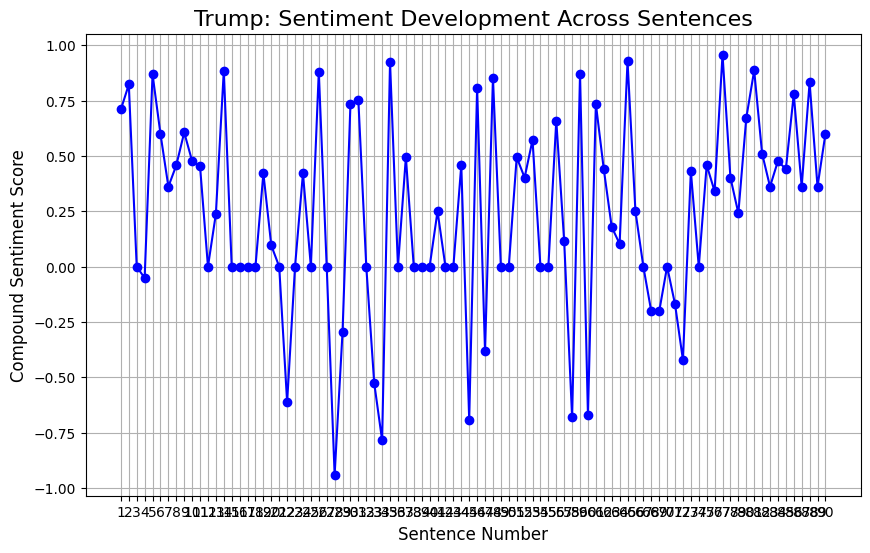

In [79]:
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# # Example speech text
# speech = """
# My fellow Americans, we face many challenges today. But together, we can overcome them.
# Our nation is strong, resilient, and full of hope. Let us work for a brighter future for all.
# """

# # Initialize VADER sentiment analyzer
# sia = SentimentIntensityAnalyzer()

# # Tokenize speech into sentences
# sentences = sent_tokenize(speech)

# Collect data: sentence and compound score
data_trump = []
for i, sentence in enumerate(sentences_trump, 1):
    sentiment = sia.polarity_scores(sentence)
    compound = sentiment['compound']
    data_trump.append({'Sentence': sentence, 'Compound': compound})

# Convert to DataFrame for easier handling
df_trump = pd.DataFrame(data_trump)

# Display the DataFrame
print(df_trump)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_trump) + 1), df_trump['Compound'], marker='o', linestyle='-', color='b')
plt.title("Trump: Sentiment Development Across Sentences", fontsize=16)
plt.xlabel("Sentence Number", fontsize=12)
plt.ylabel("Compound Sentiment Score", fontsize=12)
plt.xticks(range(1, len(df_trump) + 1))  # Show sentence numbers on X-axis
plt.grid(True)
plt.show()


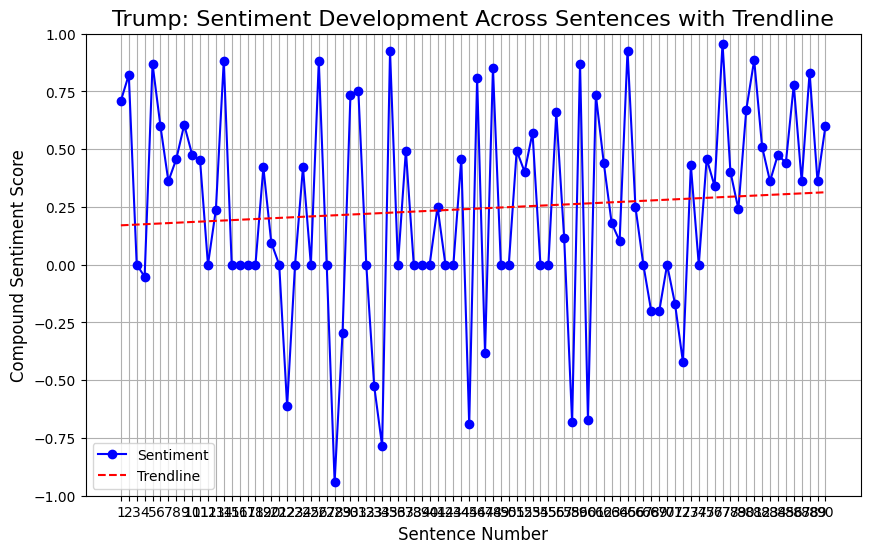

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_trump) + 1), df_trump['Compound'], marker='o', linestyle='-', color='b', label='Sentiment')

# Fit a linear trendline (1st degree polynomial)
x_values = np.arange(1, len(df_trump) + 1)
y_values = df_trump['Compound']

# Use polyfit to fit a linear trendline (1st-degree polynomial)
coefficients = np.polyfit(x_values, y_values, 1)  # Degree 1 for linear
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(x_values, trendline(x_values), color='r', linestyle='--', label='Trendline')

# Fix the Y-axis range
plt.ylim(-1, 1)

# Add titles and labels
plt.title("Trump: Sentiment Development Across Sentences with Trendline", fontsize=16)
plt.xlabel("Sentence Number", fontsize=12)
plt.ylabel("Compound Sentiment Score", fontsize=12)

# Add grid and customize ticks
plt.xticks(range(1, len(df_trump) + 1))  # Ensure each sentence number is labeled
plt.grid(True)

# Show the legend
plt.legend()

# Show the plot
plt.show()

Analyzing Obama

In [81]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the analyzer
sia = SentimentIntensityAnalyzer()

# Example speech (replace with your actual text)
speech_obama = open('speeches/2013-Obama.txt', encoding='latin-1').read()

# Direct analysis
overall_sentiment = sia.polarity_scores(speech_obama)
print("Overall Sentiment:", overall_sentiment)

# Segmented analysis
from nltk.tokenize import sent_tokenize

# Tokenize into sentences (install punkt tokenizer if not done already)
sentences_obama = sent_tokenize(speech_obama)
for i, sentence in enumerate(sentences_obama, 1):
    sentiment = sia.polarity_scores(sentence)
    print(f"Sentence {i} Sentiment:", sentiment)

# Count total words
words = speech_obama.split()
word_count = len(words)
print(f"Total words in the file: {word_count}")

letters = len(speech_obama)
print(letters)

Overall Sentiment: {'neg': 0.076, 'neu': 0.729, 'pos': 0.195, 'compound': 0.9998}
Sentence 1 Sentiment: {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
Sentence 2 Sentiment: {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}
Sentence 3 Sentiment: {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'compound': 0.8555}
Sentence 4 Sentiment: {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.3182}
Sentence 5 Sentiment: {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.4215}
Sentence 6 Sentiment: {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.9169}
Sentence 7 Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence 8 Sentiment: {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9287}
Sentence 9 Sentiment: {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.5837}
Sentence 10 Sentiment: {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.4404}
Sentence 11 Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence 12 Senti

                                             Sentence  Compound
0                                          Thank you.    0.3612
1                                  Thank you so much.    0.3612
2   Vice President Biden, Mr. Chief Justice, Membe...    0.8555
3             We affirm the promise of our democracy.    0.3182
4   We recall that what binds this Nation together...    0.4215
..                                                ...       ...
85  You and I, as citizens, have the obligation to...    0.7856
86  Let us, each of us, now embrace with solemn du...    0.8720
87  With common effort and common purpose, with pa...    0.8658
88                                         Thank you.    0.3612
89  God bless you, and may He forever bless these ...    0.8591

[90 rows x 2 columns]


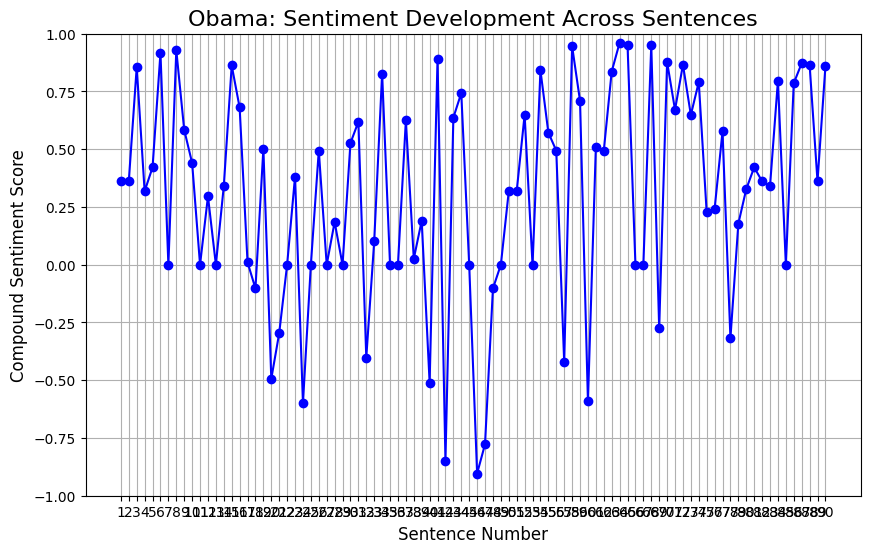

In [82]:
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# # Example speech text
# speech = """
# My fellow Americans, we face many challenges today. But together, we can overcome them.
# Our nation is strong, resilient, and full of hope. Let us work for a brighter future for all.
# """

# # Initialize VADER sentiment analyzer
# sia = SentimentIntensityAnalyzer()

# # Tokenize speech into sentences
# sentences = sent_tokenize(speech)

# Collect data: sentence and compound score
data_obama = []
for i, sentence in enumerate(sentences_obama, 1):
    sentiment = sia.polarity_scores(sentence)
    compound = sentiment['compound']
    data_obama.append({'Sentence': sentence, 'Compound': compound})

# Convert to DataFrame for easier handling
df_obama = pd.DataFrame(data_obama)

# Display the DataFrame
print(df_obama)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_obama) + 1), df_obama['Compound'], marker='o', linestyle='-', color='b')
plt.ylim(-1, 1)
plt.title("Obama: Sentiment Development Across Sentences", fontsize=16)
plt.xlabel("Sentence Number", fontsize=12)
plt.ylabel("Compound Sentiment Score", fontsize=12)
plt.xticks(range(1, len(df_obama) + 1))  # Show sentence numbers on X-axis
plt.grid(True)
plt.show()

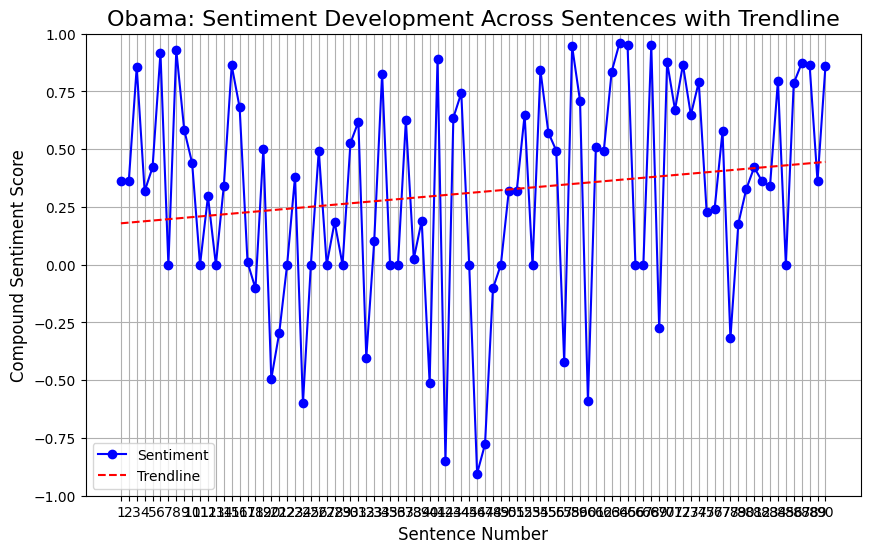

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_obama) + 1), df_obama['Compound'], marker='o', linestyle='-', color='b', label='Sentiment')

# Fit a linear trendline (1st degree polynomial)
x_values = np.arange(1, len(df_trump) + 1)
y_values = df_obama['Compound']

# Use polyfit to fit a linear trendline (1st-degree polynomial)
coefficients = np.polyfit(x_values, y_values, 1)  # Degree 1 for linear
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(x_values, trendline(x_values), color='r', linestyle='--', label='Trendline')

# Fix the Y-axis range
plt.ylim(-1, 1)

# Add titles and labels
plt.title("Obama: Sentiment Development Across Sentences with Trendline", fontsize=16)
plt.xlabel("Sentence Number", fontsize=12)
plt.ylabel("Compound Sentiment Score", fontsize=12)

# Add grid and customize ticks
plt.xticks(range(1, len(df_obama) + 1))  # Ensure each sentence number is labeled
plt.grid(True)

# Show the legend
plt.legend()

# Show the plot
plt.show()

Analyzing Kennedy

In [84]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the analyzer
sia = SentimentIntensityAnalyzer()

# Example speech (replace with your actual text)
speech_kennedy = open('speeches/1961-Kennedy.txt', encoding='latin-1').read()

# Direct analysis
overall_sentiment = sia.polarity_scores(speech_kennedy)
print("Overall Sentiment:", overall_sentiment)

# Segmented analysis
from nltk.tokenize import sent_tokenize

# Tokenize into sentences (install punkt tokenizer if not done already)
sentences_kennedy = sent_tokenize(speech_kennedy)
for i, sentence in enumerate(sentences_kennedy, 1):
    sentiment = sia.polarity_scores(sentence)
    print(f"Sentence {i} Sentiment:", sentiment)

# Count total words
words = speech_kennedy.split()
word_count = len(words)
print(f"Total words in the file: {word_count}")


letters = len(speech_kennedy)
print(letters)

Overall Sentiment: {'neg': 0.128, 'neu': 0.684, 'pos': 0.188, 'compound': 0.9989}
Sentence 1 Sentiment: {'neg': 0.03, 'neu': 0.728, 'pos': 0.242, 'compound': 0.9131}
Sentence 2 Sentiment: {'neg': 0.058, 'neu': 0.848, 'pos': 0.094, 'compound': 0.2023}
Sentence 3 Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence 4 Sentiment: {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.5106}
Sentence 5 Sentiment: {'neg': 0.075, 'neu': 0.775, 'pos': 0.15, 'compound': 0.665}
Sentence 6 Sentiment: {'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.1695}
Sentence 7 Sentiment: {'neg': 0.115, 'neu': 0.74, 'pos': 0.146, 'compound': 0.4588}
Sentence 8 Sentiment: {'neg': 0.207, 'neu': 0.471, 'pos': 0.322, 'compound': 0.7783}
Sentence 9 Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence 10 Sentiment: {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.8934}
Sentence 11 Sentiment: {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.4215}
Sentence 1

                                             Sentence  Compound
0   Vice President Johnson, Mr. Speaker, Mr. Chief...    0.9131
1   For I have sworn I before you and Almighty God...    0.2023
2                    The world is very different now.    0.0000
3   For man holds in his mortal hands the power to...   -0.5106
4   And yet the same revolutionary beliefs for whi...    0.6650
5   We dare not forget today that we are the heirs...    0.1695
6   Let the word go forth from this time and place...    0.4588
7   Let every nation know, whether it wishes us we...    0.7783
8                    This much we pledge -- and more.    0.0000
9   To those old allies whose cultural and spiritu...    0.8934
10  United, there is little we cannot do in a host...    0.4215
11  Divided, there is little we can do -- for we d...   -0.3724
12  To those new States whom we welcome to the ran...    0.7430
13  We shall not always expect to find them suppor...    0.4404
14  But we shall always hope to find the

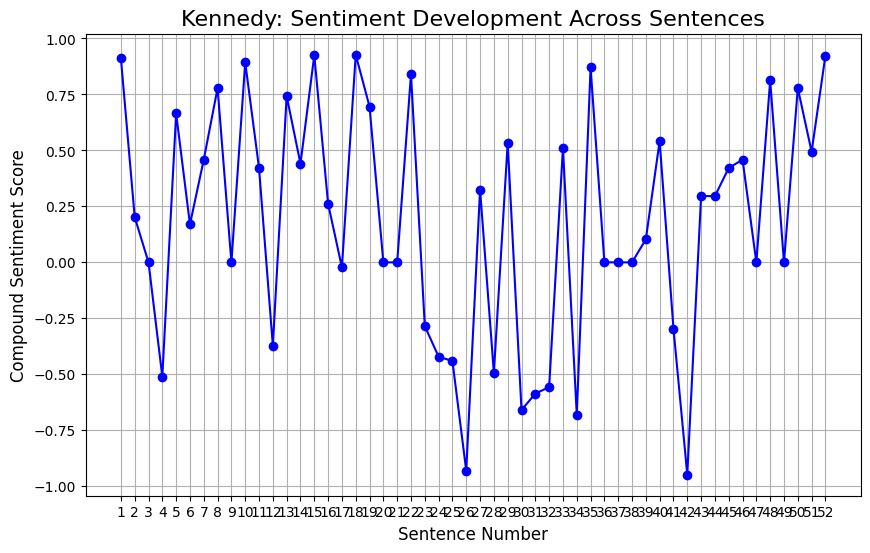

In [85]:
data_kennedy = []
for i, sentence in enumerate(sentences_kennedy, 1):
    sentiment = sia.polarity_scores(sentence)
    compound = sentiment['compound']
    data_kennedy.append({'Sentence': sentence, 'Compound': compound})

# Convert to DataFrame for easier handling
df_kennedy = pd.DataFrame(data_kennedy)

# Display the DataFrame
print(df_kennedy)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_kennedy) + 1), df_kennedy['Compound'], marker='o', linestyle='-', color='b')
plt.title("Kennedy: Sentiment Development Across Sentences", fontsize=16)
plt.xlabel("Sentence Number", fontsize=12)
plt.ylabel("Compound Sentiment Score", fontsize=12)
plt.xticks(range(1, len(df_kennedy) + 1))  # Show sentence numbers on X-axis
plt.grid(True)

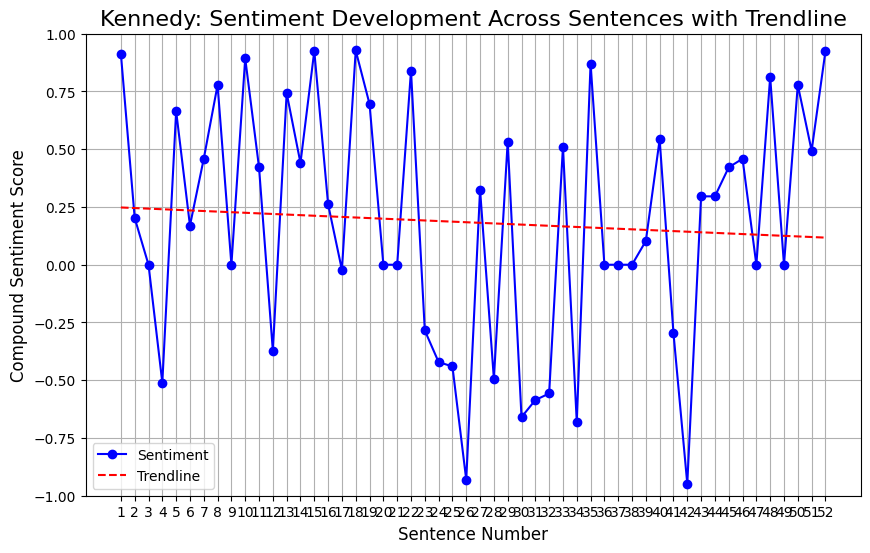

In [86]:
import numpy as np
import matplotlib.pyplot as plt


# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_kennedy) + 1), df_kennedy['Compound'], marker='o', linestyle='-', color='b', label='Sentiment')

# Fit a linear trendline (1st degree polynomial)
x_values = np.arange(1, len(df_kennedy) + 1)
y_values = df_kennedy['Compound']

# Use polyfit to fit a linear trendline (1st-degree polynomial)
coefficients = np.polyfit(x_values, y_values, 1)  # Degree 1 for linear
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(x_values, trendline(x_values), color='r', linestyle='--', label='Trendline')

# Fix the Y-axis range
plt.ylim(-1, 1)

# Add titles and labels
plt.title("Kennedy: Sentiment Development Across Sentences with Trendline", fontsize=16)
plt.xlabel("Sentence Number", fontsize=12)
plt.ylabel("Compound Sentiment Score", fontsize=12)

# Add grid and customize ticks
plt.xticks(range(1, len(df) + 1))  # Ensure each sentence number is labeled
plt.grid(True)

# Show the legend
plt.legend()

# Show the plot
plt.show()
